In [1]:
from musicntd.model.current_plot import *
import musicntd.scripts.final_tests as test
import musicntd.autosimilarity_segmentation as as_seg
import musicntd.scripts.hide_code
import pandas as pd

C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Final results

In this notebook are presented our final segmentation results for this version of the code. These are the results presented in the paper.

## Parameters

In [2]:
# Fixed hyperparams
subdivision = 96
annotations_type = "MIREX10"
penalty_func = "modulo8" # "Favouring 8, then modulo 4"

In [3]:
# Paths
entire_rwc = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Entire RWC"
even_songs = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Even songs"
odd_songs = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Odd songs"

For these final tests, we will try ranks for $H$ and $Q$ in the range [12,16,20,24,28,32,36,40,44,48], and a range for the parameter $\lambda$ of $[0,2[$ with a step of $0.1$.

In [4]:
ranks_rhythm = [12,16,20,24,28,32,36,40,44,48]
ranks_pattern = [12,16,20,24,28,32,36,40,44,48]
penalty_range = [i/10 for i in range(0,20)]

Below is the convolution kernel we will use.

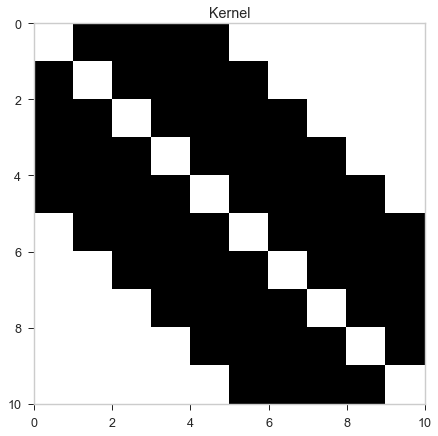

In [5]:
convolution_type = "eight_bands"
plot_me_this_spectrogram(as_seg.compute_all_kernels(10, convolution_type = convolution_type)[-1], title="Kernel", x_axis = None, y_axis = None)

#  Unincluded: Fixed parameters

We begin by a condition (not included in the paper) where we fix all parameters. In that sense, it's a totally blind method. Parameters though, are fixed empirically.

Parameter $\lambda$ was fixed to 1 as it was the best parameter in the experimental notebook for the method "Favouring 8, then modulo 4".

Ranks were set to 32 for both $H$ and $Q$, as it is generally a good compromise.

In [6]:
_ = test.final_results_fixed_conditions(entire_rwc, [12,32,32], penalty_weight = 1, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func, legend = "with fixed conditions", convolution_type = convolution_type)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
Results with 0.5 seconds tolerance windowwith fixed conditions,12.06,11.05,6.75,0.5401,0.6471,0.5822


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
Results with 3 seconds tolerance windowwith fixed conditions,15.11,8.0,3.7,0.6713,0.8063,0.7249


# Cross validation on parameters

In order to find accurate parameters, we decided to proceed by 2-fold cross-validation.

Here, ranks for $H$ and $Q$ and $\lambda$ are learned on even songs and then tested on odd songs, and vice-versa.

Final results, in the paper, are means of results on both tests subsets.

Firstly:
 - learning on even songs
 - testing on odd songs

In [7]:
best_param_even, results_at_zero_five_even, results_at_three_even = test.several_ranks_with_cross_validation_of_param_RWC(learning_dataset = even_songs, testing_dataset = odd_songs,
                                                      ranks_rhythm = ranks_rhythm, ranks_pattern = ranks_pattern, penalty_range = penalty_range, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func, convolution_type = convolution_type)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,Best rank for $H$,Best rank for $Q$,Best lambda: ponderation parameter.
Learned parameters,40.0,28.0,0.8


c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 0.5 seconds tolerance window, on test dataset.",12.54,12.36,6.64,0.5285,0.663,0.5777


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 3 seconds tolerance window, on test dataset.",15.16,9.74,4.02,0.6378,0.8033,0.6989


Secondly:
 - learning on odd songs
 - testing on even songs

In [8]:
best_param_odd, results_at_zero_five_odd, results_at_three_odd = test.several_ranks_with_cross_validation_of_param_RWC(learning_dataset = odd_songs, testing_dataset = even_songs,
                                                      ranks_rhythm = ranks_rhythm, ranks_pattern = ranks_pattern, penalty_range = penalty_range, annotations_type = annotations_type, 
                                                      subdivision = subdivision, penalty_func = penalty_func, convolution_type = convolution_type)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,Best rank for $H$,Best rank for $Q$,Best lambda: ponderation parameter.
Learned parameters,48.0,24.0,1.6


c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 0.5 seconds tolerance window, on test dataset.",11.3,9.38,7.14,0.5619,0.6097,0.5815


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 3 seconds tolerance window, on test dataset.",14.54,6.14,3.9,0.7161,0.7815,0.7431


Final results:

With 0.5 seconds tolerance window:

In [9]:
test_mean_zero_five = [(results_at_zero_five_even[i] + results_at_zero_five_odd[i])/2 for i in range(6)]
pd.DataFrame(test_mean_zero_five, index = ['True Positive','False Positives','False Negatives','Precision', 'Recall', 'F measure'], columns = ["Results at 0.5 seconds on both test datasets"]).T

,True Positive,False Positives,False Negatives,Precision,Recall,F measure
Results at 0.5 seconds on both test datasets,11.92,10.87,6.89,0.5452,0.6363,0.5796


With 3 seconds tolerance window:

In [10]:
test_mean_three = [(results_at_three_even[i] + results_at_three_odd[i])/2 for i in range(6)]
pd.DataFrame(test_mean_three, index = ['True Positives','False Positives','False Negatives','Precision', 'Recall', 'F measure'], columns = ["Results at 3 seconds on both test datasets"]).T

,True Positives,False Positives,False Negatives,Precision,Recall,F measure
Results at 3 seconds on both test datasets,14.85,7.94,3.96,0.677,0.7924,0.721


# Oracle ranks

This below contains the results in the oracle ranks condition, which means that, for each song, we keep only the ranks leading to the best F measure.

In [11]:
penalty_weight = 1 # Fixed to one rather than learned, for convenience
zero_five_full = test.oracle_ranks(entire_rwc, ranks_rhythm, ranks_pattern, penalty_weight, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func, convolution_type = convolution_type)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Oracles ranks, at 0.5 seconds",14.93,7.67,3.88,0.6847,0.7999,0.7303


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Oracles ranks, at 3 seconds",17.07,5.04,1.74,0.7948,0.9124,0.8414


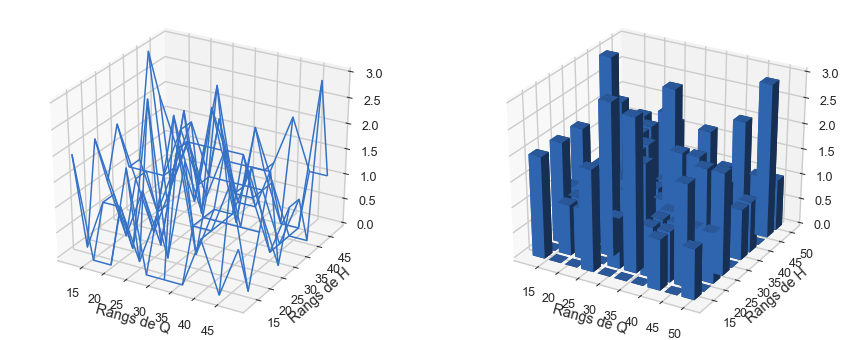

In [12]:
musicntd.scripts.hide_code.plot_3d_ranks_study(zero_five_full, ranks_rhythm, ranks_pattern)

# On signal

Below are presented the results when we segment directly the autosimilarity of the signal.

This allows us to compare the benefit directly related to the NTD in the segmentation.

In [7]:
sig_zero_five_even, sig_three_even = test.cross_validation_on_signal(even_songs, odd_songs, penalty_range, convolution_type = convolution_type)

,Best lambda: ponderation parameter.
Learned parameter.,1.6


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 0.5 seconds tolerance window, on test dataset.",8.96,11.36,10.22,0.4488,0.4874,0.4599


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 3 seconds tolerance window, on test dataset.",13.68,6.64,5.5,0.6839,0.7254,0.6937


In [8]:
sig_zero_five_odd, sig_three_odd = test.cross_validation_on_signal(odd_songs, even_songs, penalty_range, convolution_type = convolution_type)

,Best lambda: ponderation parameter.
Learned parameter.,1.6


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 0.5 seconds tolerance window, on test dataset.",8.18,11.32,10.26,0.4288,0.4445,0.4343


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"Results with 3 seconds tolerance window, on test dataset.",12.9,6.6,5.54,0.6684,0.6948,0.6786


Finally, the final results are, at 0.5 seconds:

In [9]:
sig_test_mean_zero_five = [(sig_zero_five_odd[i] + sig_zero_five_even[i])/2 for i in range(6)]
pd.DataFrame(sig_test_mean_zero_five, index = ['True Positive','False Positives','False Negatives','Precision', 'Recall', 'F measure'], columns = ["Results at 0.5 seconds on both test datasets"]).T

,True Positive,False Positives,False Negatives,Precision,Recall,F measure
Results at 0.5 seconds on both test datasets,8.57,11.34,10.24,0.4388,0.4659,0.4471


And at 3 seconds:

In [10]:
sig_test_mean_three = [(sig_three_odd[i] + sig_three_even[i])/2 for i in range(6)]
pd.DataFrame(sig_test_mean_three, index = ['True Positive','False Positives','False Negatives','Precision', 'Recall', 'F measure'], columns = ["Results at 0.5 seconds on both test datasets"]).T

,True Positive,False Positives,False Negatives,Precision,Recall,F measure
Results at 0.5 seconds on both test datasets,13.29,6.62,5.52,0.6762,0.7101,0.6862


Also not included in the paper are below the results of the segmentation of the autosimilarity of the signal on the entire RWC dataset, but without the penalty regularization function. As we can see, the penalty function greatly impactes the segmentation when sementing the signal.

In [6]:
test.results_on_signal_without_lambda(entire_rwc, convolution_type = convolution_type, legend = "on the signal and on all RWC, without penalty function.")

,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"0.5 secondes results on the signal and on all RWC, without penalty function.",6.94,18.61,11.87,0.283,0.3774,0.3201


,True Positives,False Positives,False Negatives,Precision,Recall,F measure
"3 secondes results on the signal and on all RWC, without penalty function.",12.04,13.51,6.77,0.4747,0.643,0.5409
